In [1]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt
import yfinance as yf
import pandas as pd
import datetime
import time
from arch import arch_model
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
stocks = 'IMOEX.ME'
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2022, 1, 1)
s_p500 = yf.download(stocks, start=start, end = end, interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
ret = 100 * (s_p500.pct_change()[1:]['Adj Close']) 
realized_vol = ret.rolling(5).std()

In [4]:
np.std(ret)

1.1648606960183412

In [5]:
print(np.mean(realized_vol))

0.9786358582485897


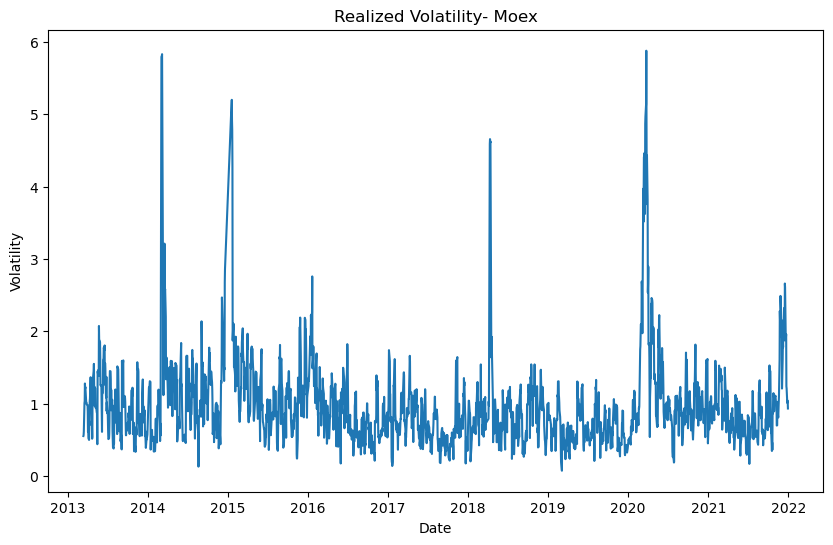

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index,realized_vol) 
plt.title('Realized Volatility- Moex') 
plt.ylabel('Volatility') 
plt.xlabel('Date') 
plt.show()

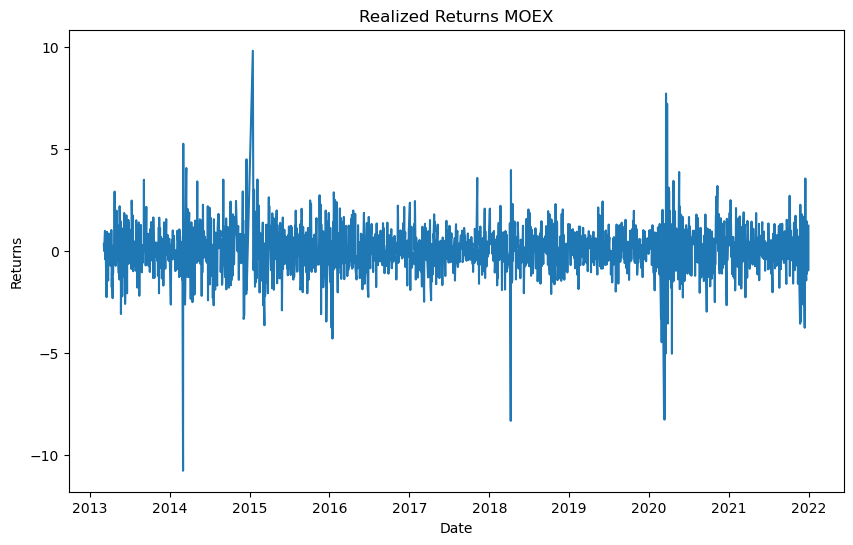

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(ret.index,ret) 
plt.title('Realized Returns MOEX') 
plt.ylabel('Returns') 
plt.xlabel('Date') 
plt.show()

In [8]:
n=252
split_date = ret.iloc[-n:].index

# GARCH

In [42]:
bic_garch = []
for p in range(1, 5): 
    for q in range(1, 5):
        garch = arch_model(ret, mean='zero',vol='GARCH', p=p, o=0, q=q).fit(disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q
garch = arch_model(ret, mean='zero', vol='GARCH', p=p, o=0, q=q).fit(disp='off')
print(garch.summary())
forecast = garch.forecast(start=split_date[0]) 
forecast_garch = forecast

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3216.32
Distribution:                  Normal   AIC:                           6450.64
Method:            Maximum Likelihood   BIC:                           6501.82
                                        No. Observations:                 2179
Date:                Wed, Jan 25 2023   Df Residuals:                     2179
Time:                        14:51:45   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1357      0.101      1.349      0.177  [-

In [43]:
rmse_garch = np.sqrt(mean_squared_error(realized_vol[-n:]/100, np.sqrt(forecast_garch.variance.iloc[-len(split_date):]/ 100)))
print('The RMSE value of GARCH models is {:.4f}'.format(rmse_garch))

The RMSE value of GARCH models is 0.0979


In [46]:
bic_garch = []
for p in range(1, 5): 
    for q in range(1, 5):
        garch = arch_model(ret, mean='zero',vol='GARCH', p=p, o=0, q=q).fit(disp='off')
        bic_garch.append(garch.bic)
        if garch.bic == np.min(bic_garch):
            best_param = p, q
garch = arch_model(ret, mean='zero', vol='GARCH', p=p, o=0, q=q).fit(disp='off')
print(garch.summary())
forecast = garch.forecast(start=split_date[0], simulations = 10000, method='bootstrap') 
forecast_garch = forecast

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3216.32
Distribution:                  Normal   AIC:                           6450.64
Method:            Maximum Likelihood   BIC:                           6501.82
                                        No. Observations:                 2179
Date:                Wed, Jan 25 2023   Df Residuals:                     2179
Time:                        14:52:49   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.1357      0.101      1.349      0.177  [-

In [47]:
rmse_garch = np.sqrt(mean_squared_error(realized_vol[-n:]/100, np.sqrt(forecast_garch.variance.iloc[-len(split_date):]/ 100)))
print('The RMSE value of GARCH models is {:.4f}'.format(rmse_garch))

The RMSE value of GARCH models is 0.0979


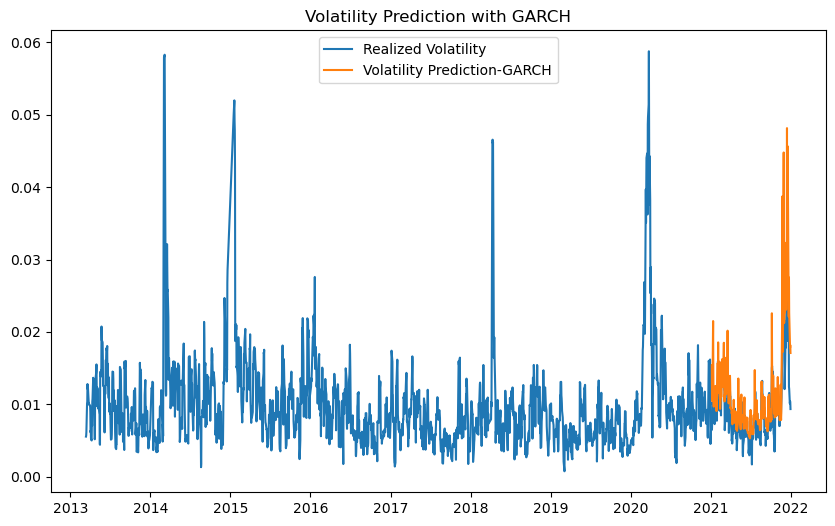

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility') 
plt.plot(forecast_garch.variance.iloc[-len(split_date):] / 100, label='Volatility Prediction-GARCH')
plt.title('Volatility Prediction with GARCH', fontsize=12) 
plt.legend()
plt.show()

# EGARCH

In [48]:
bic_egarch = []
for p in range(1, 5): 
    for q in range(1, 5):
        egarch = arch_model(ret, mean='zero',vol='EGARCH', p=p, o=1, q=q).fit(disp='off')
        bic_egarch.append(egarch.bic)
        if egarch.bic == np.min(bic_egarch):
            best_param = p, q
egarch = arch_model(ret, mean='zero', vol='EGARCH', p=p, o=1, q=q).fit(disp='off')
print(egarch.summary())
forecast = egarch.forecast(start=split_date[0], simulations = 10000, method='bootstrap') 
forecast_egarch = forecast

                       Zero Mean - EGARCH Model Results                       
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -3191.60
Distribution:                  Normal   AIC:                           6403.20
Method:            Maximum Likelihood   BIC:                           6460.07
                                        No. Observations:                 2179
Date:                Wed, Jan 25 2023   Df Residuals:                     2179
Time:                        14:53:27   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0186  8.895e-03      2.094  3.625e-02 [1.

In [49]:
rmse_egarch = np.sqrt(mean_squared_error(realized_vol[-n:]/100, np.sqrt(forecast_egarch.variance.iloc[-len(split_date):]/ 100)))
print('The RMSE value of GARCH models is {:.4f}'.format(rmse_egarch))

The RMSE value of GARCH models is 0.0971


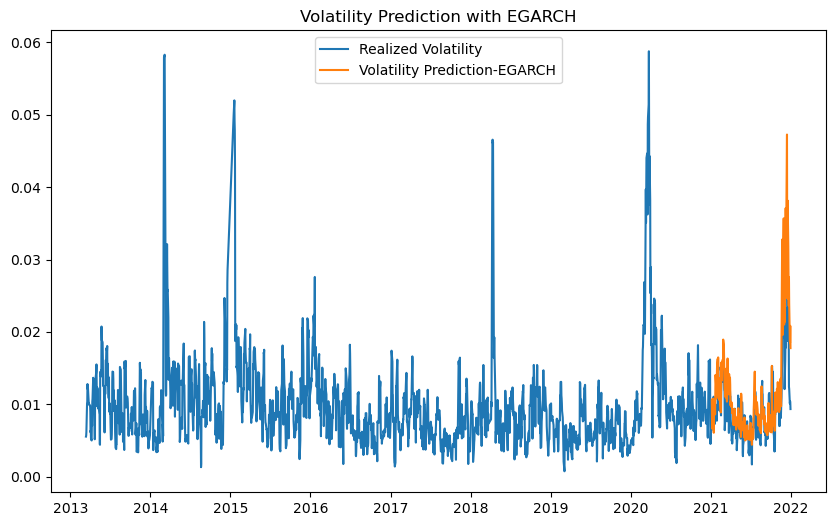

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility') 
plt.plot(forecast_egarch.variance.iloc[-len(split_date):] / 100, label='Volatility Prediction-EGARCH')
plt.title('Volatility Prediction with EGARCH', fontsize=12) 
plt.legend()
plt.show()

# Support Vector Regression-GARCH

In [15]:
from sklearn.svm import SVR
from scipy.stats import uniform as sp_rand
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [16]:
realized_vol = pd.DataFrame(realized_vol) 
realized_vol.reset_index(drop=True, inplace=True)

In [17]:
returns_svm = ret ** 2
returns_svm = returns_svm.reset_index()
del returns_svm['Date']

In [18]:
X = pd.concat([realized_vol, returns_svm], axis=1, ignore_index=True)
X = X[4:].copy()
X = X.reset_index()
X.drop('index', axis=1, inplace=True)

In [19]:
realized_vol = realized_vol.dropna().reset_index() 
realized_vol.drop('index', axis=1, inplace=True)

In [20]:
svr_poly = SVR(kernel='poly') 
svr_lin = SVR(kernel='linear') 
svr_rbf = SVR(kernel='rbf')

In [21]:
para_grid = {'gamma': sp_rand(), 'C': sp_rand(),'epsilon': sp_rand()}
clf = RandomizedSearchCV(svr_lin, para_grid)
clf.fit(X.iloc[:-n].values, realized_vol.iloc[1:-(n-1)].values.reshape(-1,))
predict_svr_lin = clf.predict(X.iloc[-n:])

In [22]:
predict_svr_lin = pd.DataFrame(predict_svr_lin)
predict_svr_lin.index = ret.iloc[-n:].index

In [23]:
rmse_svr = np.sqrt(mean_squared_error(realized_vol.iloc[-n:] / 100, predict_svr_lin / 100))
print('The RMSE value of SVR with Linear Kernel is {:.6f}'.format(rmse_svr))

The RMSE value of SVR with Linear Kernel is 0.000719


In [24]:
realized_vol.index = ret.iloc[4:].index

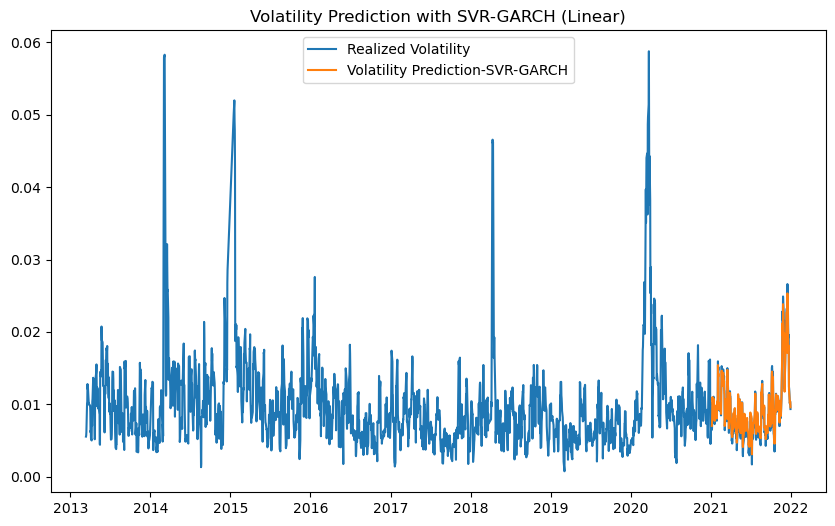

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility') 
plt.plot(predict_svr_lin / 100, label='Volatility Prediction-SVR-GARCH')
plt.title('Volatility Prediction with SVR-GARCH (Linear)', fontsize=12) 
plt.legend()
plt.show()

# new kernel

In [26]:
para_grid ={'gamma': sp_rand(), 'C': sp_rand(),'epsilon': sp_rand()}
clf = RandomizedSearchCV(svr_rbf, para_grid)
clf.fit(X.iloc[:-n].values, realized_vol.iloc[1:-(n-1)].values.reshape(-1,))
predict_svr_rbf = clf.predict(X.iloc[-n:])

In [27]:
predict_svr_rbf = pd.DataFrame(predict_svr_rbf)
predict_svr_rbf.index = ret.iloc[-n:].index

In [28]:
rmse_svr_rbf = np.sqrt(mean_squared_error(realized_vol.iloc[-n:] / 100, predict_svr_rbf / 100))
print('The RMSE value of SVR with RBF Kernel is {:.6f}'.format(rmse_svr_rbf))

The RMSE value of SVR with RBF Kernel is 0.000612


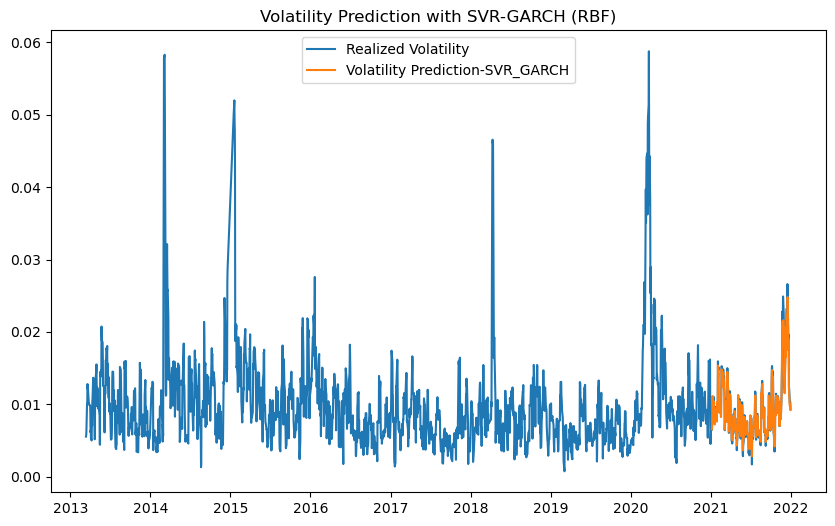

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility')
plt.plot(predict_svr_rbf / 100, label='Volatility Prediction-SVR_GARCH')
plt.title('Volatility Prediction with SVR-GARCH (RBF)', fontsize=12) 
plt.legend()
plt.show()

# polynomial kernel

In [30]:
para_grid = {'gamma': sp_rand(), 'C': sp_rand(),'epsilon': sp_rand()}
clf = RandomizedSearchCV(svr_poly, para_grid)
clf.fit(X.iloc[:-n].values, realized_vol.iloc[1:-(n-1)].values.reshape(-1,))
predict_svr_poly = clf.predict(X.iloc[-n:])

In [31]:
predict_svr_poly = pd.DataFrame(predict_svr_poly)
predict_svr_poly.index = ret.iloc[-n:].index

In [32]:
rmse_svr_poly = np.sqrt(mean_squared_error(realized_vol.iloc[-n:] / 100, predict_svr_poly / 100))
print('The RMSE value of SVR with Polynomial Kernel is {:.6f}'.format(rmse_svr_poly))

The RMSE value of SVR with Polynomial Kernel is 0.003604


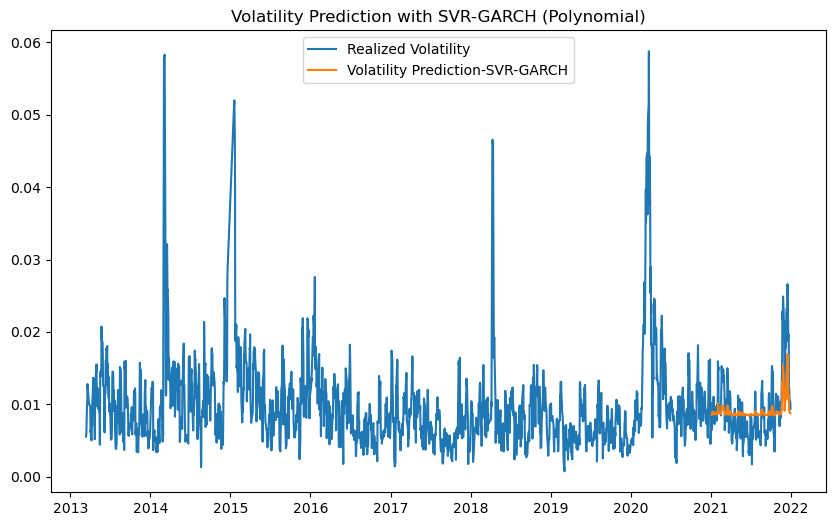

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol/100, label='Realized Volatility')
plt.plot(predict_svr_poly/100, label='Volatility Prediction-SVR-GARCH')
plt.title('Volatility Prediction with SVR-GARCH (Polynomial)', fontsize=12) 
plt.legend()
plt.show()

Neutral network

In [34]:
from sklearn.neural_network import MLPRegressor
NN_vol = MLPRegressor(learning_rate_init=0.001, random_state=1)
para_grid_NN = {'hidden_layer_sizes': [(100, 50), (50, 50), (10, 100)], 
                'max_iter': [500, 1000],'alpha': [0.00005, 0.0005 ]} 
clf = RandomizedSearchCV(NN_vol, para_grid_NN)
clf.fit(X.iloc[:-n].values,realized_vol.iloc[1:-(n-1)].values.reshape(-1, ))
NN_predictions = clf.predict(X.iloc[-n:])

In [35]:
NN_predictions = pd.DataFrame(NN_predictions)
NN_predictions.index = ret.iloc[-n:].index

In [36]:
rmse_NN = np.sqrt(mean_squared_error(realized_vol.iloc[-n:] / 100, NN_predictions / 100))
print('The RMSE value of NN is {:.6f}'.format(rmse_NN))

The RMSE value of NN is 0.000822


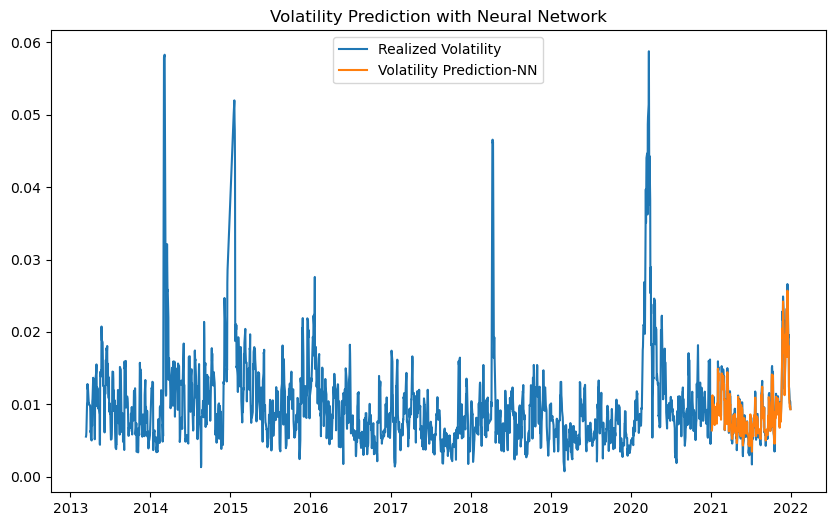

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100, label='Realized Volatility') 
plt.plot(NN_predictions / 100, label='Volatility Prediction-NN') 
plt.title('Volatility Prediction with Neural Network', fontsize=12) 
plt.legend()
plt.show()

# dl

In [38]:
!pip install torch

In [39]:
import torch